In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path_to_file = '5_user_data.csv'
users = pd.read_csv(path_to_file)
path_to_file2 = '5_logs.csv'
logs = pd.read_csv(path_to_file2)


In [9]:
users.shape

(2954, 3)

In [11]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


5. Определите, сколько пустых значений в датафрейме `user_data`

In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [8]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


Ваш стартап планирует выбрать амбассадоров продукта, чтобы через них продвигать игру. Для этого менеджер хочет встретиться с наиболее активными клиентами, которые дают больше других верных ответов. А ваша задача — выявить таких клиентов.

**Определите, какой клиент или клиенты дали наибольшее количество успешных ответов. Перечислите их идентификаторы (см.колонку `client`) через запятую и пробел в порядке возрастания**. Например:

`12, 123, 456`

In [172]:
right_answers = logs.query('success == True')\
            .client.value_counts()\
            .reset_index()\
            .rename(columns={'index' : 'client', 'client' : 'count_success'})

In [173]:
right_answers

,client,count_success
0,36165,41
1,61468,41
2,12179,41
3,61473,41
4,78349,41
...,...,...
2840,36194,1
2841,57752,1
2842,84618,1
2843,53228,1


3. Определите максимальное число успешных ответов в этих данных

In [174]:
right_answers.query('count_success >= 41')

,client,count_success
0,36165,41
1,61468,41
2,12179,41
3,61473,41
4,78349,41
5,28719,41
6,92584,41
7,52870,41
8,82563,41


5. Получите идентификатор(ы) такого клиента / таких клиентов. Если их несколько — отсортируйте идентификаторы по возрастанию. Скопируйте получившийся результат, без скобок

In [175]:
right_answers.client.sort_values()

2097       40
1240       50
2335       75
1827       81
951       132
        ...  
576     99926
2003    99927
2000    99931
2104    99973
1146    99993
Name: client, Length: 2845, dtype: int64

Команда стартапа хочет развивать свою игру, но имеет ограниченные ресурсы, поэтому решила определиться, с какой платформы стоит начать. **Выясните, с какой платформы было дано наибольшее количество успешных ответов**

In [95]:
platform_count = logs.query('success == True')\
            .groupby('platform')\
            .size()\
            .reset_index(name='count')\
            .sort_values(by='count', ascending=False)
            

In [96]:
platform_count

,platform,count
1,phone,2019
0,computer,1090
2,tablet,180


Менеджер продукта выдвинул идею, что стоит сфокусироваться не просто на одной платформе, но ещё и только на сегменте премиум. **Определите, какая платформа пользуется наибольшей популярностью среди премиум-клиентов**.

In [97]:
df_1 = users.merge(logs, on='client')

In [99]:
df_1.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [108]:
premium_clients = df_1.loc[df_1['premium']==True]

In [117]:
premium_clients.groupby('platform').size().reset_index()

,platform,0
0,computer,150
1,phone,246
2,tablet,24


## Шаг 6

Самую популярную платформу среди премиум-клиентов определили, но менеджер хочет посмотреть, насколько она более востребованная, чем остальные платформы. Сравнивать числа удобнее не в таблице, а на графике. **С помощью модуля `pyplot` библиотеки `matplotlib` постройте график, демонстрирующий количество ответов премиум-клиентов на каждой платформе**. 

In [118]:
premium_platform = premium_clients.groupby('platform').size().reset_index()

In [119]:
premium_platform

,platform,0
0,computer,150
1,phone,246
2,tablet,24


In [121]:
premium_platform.rename(columns={0: 'counts_success'}, inplace=True)

In [122]:
premium_platform

,platform,counts_success
0,computer,150
1,phone,246
2,tablet,24


<BarContainer object of 3 artists>

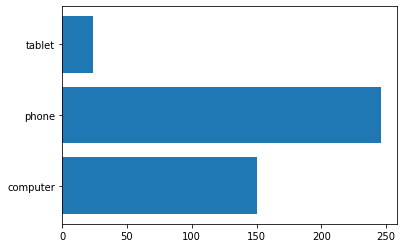

In [123]:
plt.barh(premium_platform.platform, premium_platform.counts_success)

## Шаг 7

Продожим раскручивать идею о том, что нашей команде стоит сфокусироваться на работе именно с премиум-клиентами. Посмотрите на долю неуспешных ответов от всего количества ответов — отдельно у премиум и обычных клиентов. **У какой категории клиентов доля неуспешных ответов выше?**

In [126]:
df_level7 = df_1.groupby(['premium', 'success'], as_index=False).agg({'client' : 'sum'})

In [127]:
df_level7

,premium,success,client
0,False,False,39792610
1,False,True,116563788
2,True,False,5850717
3,True,True,15264342


In [135]:
df_2 = df_level7.pivot(index='premium', columns='success', values='client')

In [140]:
df_2.rename(columns={False : 'Mistake', True : 'Right'}, inplace=True)

In [143]:
df_2['total_answers'] = df_2.Mistake + df_2.Right

In [144]:
df_2

success,Mistake,Right,total_answers
premium,,,
False,39792610,116563788,156356398
True,5850717,15264342,21115059


In [145]:
df_2['part_mistake'] = df_2.Mistake / df_2.total_answers

In [146]:
df_2

success,Mistake,Right,total_answers,part_mistake
premium,,,,
False,39792610,116563788,156356398,0.254499
True,5850717,15264342,21115059,0.277087


## Шаг 8

У команды всё ещё есть сомнения по поводу работы только с премиум-клиентами. Посмотрим, как возраст премиум-клиентов отличается от возраста обычных. **Для сравнения распределения возраста у премиум и обычных клиентов постройте две гистограммы в одном пространстве, используя функцию `plt.subplot()` из библиотеки `matplotlib`**. В обоих графиках по оси х должен идти возраст, а по оси у - количество клиентов с таким возрастом.

Выберите верные утверждения:  
- премиум-клиентов возраста примерно 35-39 лет больше, чем обычных клиентов этого же возраста
- премиум-клиентов возраста примерно 35-39 лет меньше, чем обычных клиентов этого же возраста
- у премиум-клиентов в каждую категорию возраста (столбец) попадает абсолютно одинаковое количество клиентов
- у обычных клиентов в каждую категорию возраста (столбец) попадает абсолютно одинаковое количество клиентов
- среди премиум-клиентов больше тех, кому примерно 25-30 лет, чем тех, кому примерно 20-25 лет
- среди премиум-клиентов меньше тех, кому примерно 25-30 лет, чем тех, кому примерно 20-25 лет
- у нас чуть больше 40 премиум-клиентов возраста ориентировочно 65-69 лет
- у нас около 400 премиум-клиентов возраста ориентировочно 65-69 лет

In [148]:
premium_clients

,client,premium,age,success,platform,time
23,74867,True,27,False,computer,1585452086
24,49379,True,25,False,computer,1585433626
25,88203,True,35,True,phone,1585450059
30,32603,True,20,True,computer,1585473383
52,53182,True,24,True,phone,1585406474
...,...,...,...,...,...,...
3413,52373,True,36,True,phone,1585405142
3415,13688,True,66,True,computer,1585453923
3419,40643,True,22,True,phone,1585413473
3432,53774,True,50,True,phone,1585422804


In [149]:
no_premium_clients = df_1.loc[df_1['premium']==False]

In [150]:
no_premium_clients

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3433,27470,False,40,False,computer,1585443046
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3437,29863,False,46,True,tablet,1585443437


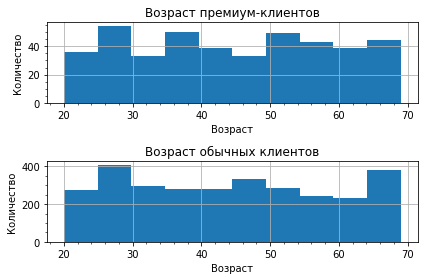

In [164]:
plt.subplot(2,1,1)
plt.hist(premium_clients.age)
plt.title('Возраст премиум-клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid()
plt.minorticks_on()
plt.subplot(2,1,2)
plt.hist(no_premium_clients.age)
plt.title('Возраст обычных клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.tight_layout()
plt.grid()
plt.minorticks_on()

## Шаг 9

Посмотрев на аналитику по премиум-клиентам, команда стартапа решила всё-таки работать со всеми категориями клиентов и в первую очередь обратить внимание на число успешных и неуспешных ответов. Так ваша работа повлияла на работу всей команды. Но не время останавливаться!

**Постройте график, отражающий распределение количества успешных ответов на пользователя.** По оси `x` должно идти число успешных ответов, а по оси `y` - сколько пользователей дали такое число успешных ответов

2. Подсчитайте количество успешных ответов для каждого клиента

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.countplot()` в параметр `x` - название серии с количеством успешных ответов для каждого клиента. **Функция сама посчитает, сколько клиентов (т.е. записей в серии) имеют то или иное число успешных ответов**
      
Например:      
```python
sns.countplot(x = series)
```
нарисует график на основе данных из серии `series`
</p>
</details>

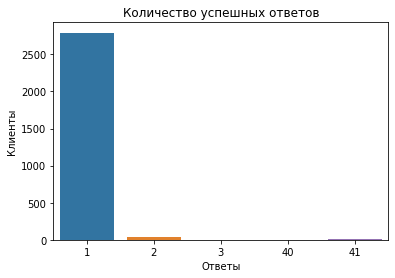

In [187]:
# plt.figure(figsize=(8, 6))  # Установка размера графика
sns.countplot(x='count_success', data=right_answers)  # Построение графика
plt.title('Количество успешных ответов')  # Заголовок графика
plt.xlabel('Ответы')  # Подпись оси X
plt.ylabel('Клиенты')  # Подпись оси Y
plt.show()  # Отображение графика

## Шаг 10

Копнем глубже и узнаем, **клиенты какого возраста дали наибольшее количество успешных ответов на компьютере?** Визуализируйте число успешных ответов, сделанных на платформе `computer`, в зависимости от возраста. По оси `x` будет идти возраст, по оси `y` – число успешных ответов.

Если из-за размера график получается нечитаемым, можно добавить `plt.figure(figsize=(12, 8))` в начало соответствующей ячейки c кодом построения визуализации

In [192]:
count_age = df_1.query('success == True')\
            .groupby('age')\
            .size()\
            .reset_index(name='count')\
            .sort_values(by='count', ascending=False)

In [193]:
count_age

,age,count
8,28,120
5,25,93
48,68,92
32,52,90
29,49,86
49,69,81
4,24,79
45,65,79
12,32,77
38,58,55


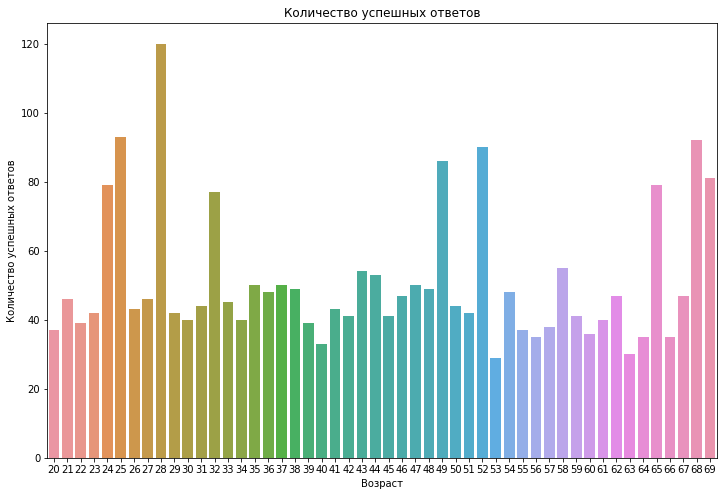

In [196]:
plt.figure(figsize=(12, 8))  # Установка размера графика
sns.barplot(x='age', y='count', data=count_age)  # Используем barplot вместо countplot
plt.title('Количество успешных ответов')  # Заголовок графика
plt.xlabel('Возраст')  # Подпись оси X
plt.ylabel('Количество успешных ответов')  # Подпись оси Y
plt.show()  # Отображение графика

## Итоги

Итак, вы собрали ту аналитику, которая на данном этапе требовалась команде геймдев-стартапа для принятия решения о векторе развития продукта. В процессе вы отработали навыки объединения данных и изменения их формы, а также построения графиков и принятия решений на основе визуализации.